# Final_Preprocessing

## 데이터 스케일링

In [ ]:
# 스케일링 처리 변수 
scaling_col = ['AVRG_TMPRT', 'DAY_RAINQTY', 'DAY_MSNF', 'AVRG_WS', 'AVRG_HUMIDITY', 
               'INDUSTRIAL_CNT', 'BAR_CNT', 'SENIOR_CENTER_CNT', 'RESTAURANT_CNT', 
               'BULID_PERMIT_CNT', 'ACCIDENT_AREA_CNT', 'ALL_POP', 'ELDER_POP']

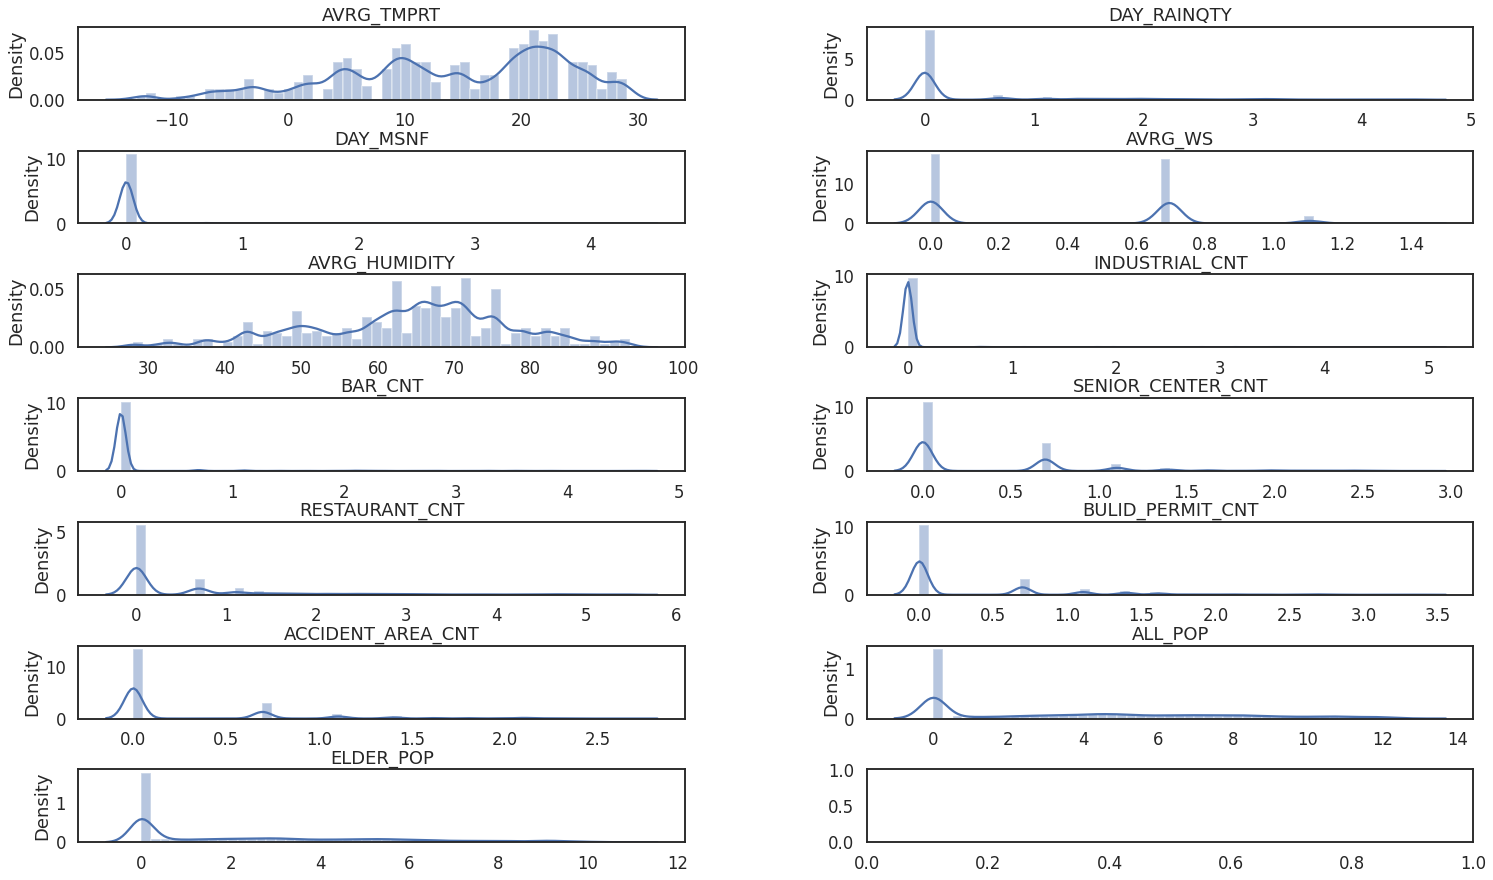

In [ ]:
# 스케일링 전 변수 분포 확인  
distplot_check(scaling_col)     

In [ ]:
# 각 컬럼 스케일링 수행 
Scaler = MinMaxScaler()

for col in scaling_col:
    data_DF[col] = Scaler.fit_transform(data_DF[col].values.reshape(-1,1))

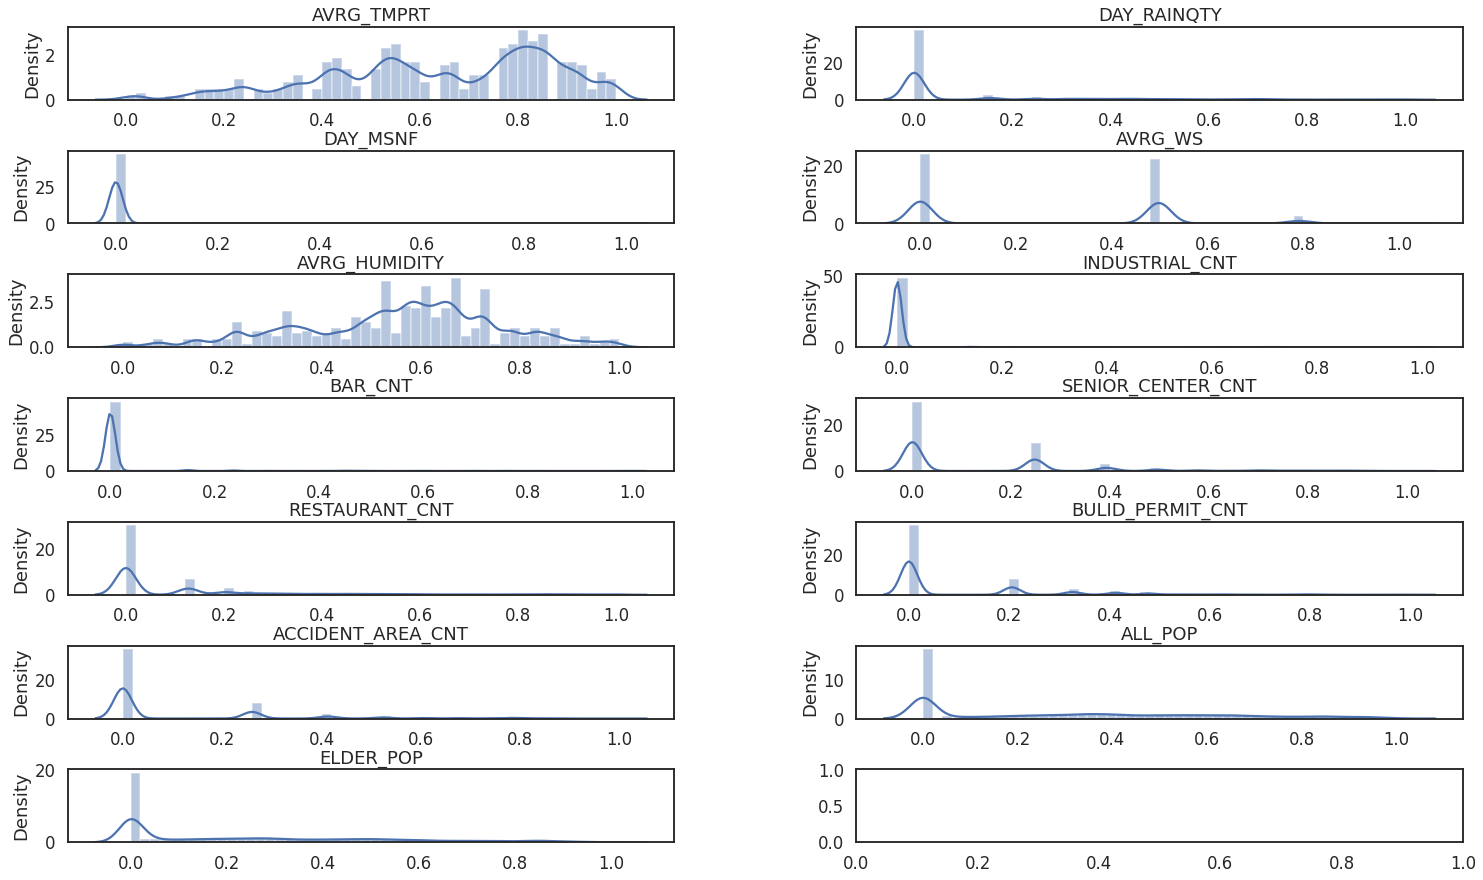

In [ ]:
# 스케일링 후 변수 분포 확인 
distplot_check(scaling_col) 

## 최종 변수 정리

In [ ]:
# 각 유동인구 col 삭제 
del_list = ["M00", "M10", "M15", "M20","M25", "M30", "M35", "M40", "M45", "M50", "M55", "M60", "M65", "M70",
            "F00", "F10", "F15", "F20","F25", "F30", "F35", "F40", "F45", "F50", "F55", "F60", "F65", "F70"]
data_DF = data_DF.drop(columns = del_list, axis=1)

In [ ]:
# 모델링에 불필요한 col 삭제
unnecessary_list = ["GRID_X_AXIS","GRID_Y_AXIS", "OCRN_YMD", "TOTAL_CNT"]
data_DF.drop(columns = unnecessary_list, axis=1, inplace=True)

In [ ]:
# 각 종속변수 이진분류 모델을 돌리기 위해서 0과 1로 변경
MCHN_CNT = data_DF.columns.get_loc("MCHN_ACDNT_OCRN_CNT")
FALL_CNT = data_DF.columns.get_loc("FALLING_OCRN_CNT")

for col in range(MCHN_CNT, FALL_CNT+1):
  data_DF.iloc[:, col] = np.where(data_DF.iloc[:, col] >= 1, 1, 0)

In [ ]:
# 이진분류 변환 확인 
data_DF["HRFAF_OCRN_CNT"].value_counts()

0    152475
1       950
Name: HRFAF_OCRN_CNT, dtype: int64

1. 모델에 사용하는 최종 독립 변수
  - MONTH : 월
  - DAY : 일
  - WEEKDAY : 요일
  - HOLIDAY : 공휴일
  - SEASON_SE_NM : 계절
  - AVRG_TMPRT : 평균기온(°C)	
  - DAY_RAINQTY : 일강수량(mm)
  - DAY_MSNF : 일적설량(cm)
  - AVRG_WS : 평균 풍속(m/s)
  - AVRG_HUMIDITY : 평균 습도(%)
  - INDUSTRIAL_CNT : 격자내 산업단지 개수
  - BAR_CNT : 격자내 유흥업소 개수
  - SENIOR_CENTER_CNT : 격자내 경로당 개수
  - RESTAURANT_CNT : 격자내 식당 개수
  - BULID_PERMIT_CNT : 격자내 건축허가 개수
  - ACCIDENT_AREA_CNT : 격자내 사고건수
  - ALL_POP : 전체 연령(65세 미만) 유동인구
  - ELDER_POP : 65세 이상 유동인구
  - GRID_ID : 격자 ID



2. 모델에 사용하는 최종 종속 변수
  - MCHN_ACDNT_OCRN_CNT         : 기계사고발생건수
  - ETC_OCRN_CNT                : 기타발생건수
  - BLTRM_OCRN_CNT             : 둔상발생건수
  - ACDNT_INJ_OCRN_CNT        : 사고부상발생건수
  - EXCL_DISEASE_OCRN_CNT      : 질병외발생건수
  - VHC_ACDNT_OCRN_CNT       : 탈것사고발생건수
  - HRFAF_OCRN_CNT             : 낙상발생건수
  - DRKNSTAT_OCRN_CNT           : 단순주취발생건수
  - ANML_INSCT_ACDNT_OCRN_CNT  : 동물곤충사고발생건수
  - FLPS_ACDNT_OCRN_CNT         : 동승자사고발생건수
  - PDST_ACDNT_OCRN_CNT         : 보행자사고발생건수
  - LACRTWND_OCRN_CNT            : 열상발생건수
  - MTRCYC_ACDNT_OCRN_CNT        : 오토바이사고발생건수
  - DRV_ACDNT_OCRN_CNT            : 운전자사고발생건수
  - BCYC_ACDNT_OCRN_CNT           : 자전거사고발생건수
  - POSNG_OCRN_CNT              : 중독발생건수
  - FALLING_OCRN_CNT             : 추락발생건수

In [ ]:
# 백업 데이터 
final_DF = data_DF.copy()

In [ ]:
final_DF.to_csv ("/content/drive/MyDrive/Competitions/a firefighting competitions/data/final_DF.csv")

## 데이터 변수명 지정


In [ ]:
# 분석할 17개의 사고의 변수명 지정 
col = ['MCHN_ACDNT_OCRN_CNT', 'ETC_OCRN_CNT', 'BLTRM_OCRN_CNT',
       'ACDNT_INJ_OCRN_CNT', 'EXCL_DISEASE_OCRN_CNT', 'VHC_ACDNT_OCRN_CNT',
       'HRFAF_OCRN_CNT', 'DRKNSTAT_OCRN_CNT', 'ANML_INSCT_ACDNT_OCRN_CNT',
       'FLPS_ACDNT_OCRN_CNT', 'PDST_ACDNT_OCRN_CNT', 'LACRTWND_OCRN_CNT',
       'MTRCYC_ACDNT_OCRN_CNT', 'DRV_ACDNT_OCRN_CNT', 'BCYC_ACDNT_OCRN_CNT',
       'POSNG_OCRN_CNT', 'FALLING_OCRN_CNT']

for i in col: # 변수명 지정 --> data_각 사고 이름 ( ex) data_HRFAF_OCRN_CNT )
    globals()["data_{}".format(i)] = pd.DataFrame()
    globals()["data_{}".format(i)] = final_DF.iloc[:,18:] # X 값
    globals()["data_{}".format(i)]["GRID_ID"] = final_DF["GRID_ID"]
    globals()["data_{}".format(i)]["label"] = final_DF[i] # 라벨 넣기

print(data_HRFAF_OCRN_CNT.head(5))

   MONTH  DAY  WEEKDAY  HOLIDAY  SEASON_SE_NM  AVRG_TMPRT  DAY_RAINQTY  \
0      1    1        4      1.0             4    0.166667          0.0   
1      1    2        5      0.0             4    0.214286          0.0   
2      1    3        6      0.0             4    0.190476          0.0   
3      1    4        0      0.0             4    0.238095          0.0   
4      1    5        1      0.0             4    0.238095          0.0   

   DAY_MSNF   AVRG_WS  AVRG_HUMIDITY  INDUSTRIAL_CNT  BAR_CNT  \
0  0.446783  0.000000       0.661538             0.0      0.0   
1  0.000000  0.498267       0.384615             0.0      0.0   
2  0.000000  0.000000       0.338462             0.0      0.0   
3  0.000000  0.000000       0.338462             0.0      0.0   
4  0.000000  0.498267       0.276923             0.0      0.0   

   SENIOR_CENTER_CNT  RESTAURANT_CNT  BULID_PERMIT_CNT  ACCIDENT_AREA_CNT  \
0           0.247407             0.0          0.411985                0.0   
1         

## undersampling 처리

In [ ]:
# 그대로 진행할시 0값에 데이터가 몰려있어 undersampling 처리 후 변수명 변경
from imblearn.under_sampling import NearMiss 
nm = NearMiss()

rus = RandomUnderSampler(random_state=0, sampling_strategy=0.7)
                         
        #                  {
        # 0: int(globals()["data_{}".format(i)][globals()["data_{}".format(i)]["label"] == 1].shape[0]*1.5),
        # 1: globals()["data_{}".format(i)][globals()["data_{}".format(i)]["label"] == 1].shape[0]})

for i in col: 
    X = globals()["data_{}".format(i)].iloc[:,:-1] 
    y = globals()["data_{}".format(i)]["label"]
    
    globals()["res_X_{}".format(i)], globals()["res_y_{}".format(i)] = rus.fit_resample(X, y) ###

    globals()["res_X_{}".format(i)]["label"] = globals()["res_y_{}".format(i)]
    globals()["res_{}".format(i)] = globals()["res_X_{}".format(i)]

    
    X = globals()["res_{}".format(i)].drop(['label'], axis=1)
    y = globals()["res_{}".format(i)]['label']
    
    # 각 사건 변수 훈련 데이터 / 테스트 데이터 분리
    globals()["X_train_{}".format(i)], \
    globals()["X_test_{}".format(i)], \
    globals()["y_train_{}".format(i)], \
    globals()["y_test_{}".format(i)] = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Undersampling 처리 결과 확인 
res_HRFAF_OCRN_CNT["label"].value_counts()

0    1357
1     950
Name: label, dtype: int64